In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import os
import sys
import json
import time
from datetime import datetime
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
%matplotlib inline


In [47]:
def extract_lineage(lineage):
    first_key = "clipper::frontend_rpc_recv"
    first_key = "clipper::task_dequeued"
    first_key = "container::send"

    keys = lineage[0].keys()
    extracted = {k: [] for k in lineage[0].keys()}
    for entry in lineage:
        start_timestamp = entry[first_key]
        for k, v in entry.items():
            if k != first_key and v > start_timestamp:
                extracted[k].append(float(v - start_timestamp) / 1000.0)
    return extracted

def analyze_lineage(path):
    with open(path, "r") as f:
        results = json.load(f)
    lineage_order = ["clipper::frontend_rpc_recv", "clipper::task_enqueued", "clipper::task_dequeued",
                    "clipper::sent_rpc", "container::recv", "container::send", "clipper::rpc_recv",
                    "clipper::task_executor_recv", "clipper::frontend_rpc_send"]
    extracted_lineage = extract_lineage(results["steady_results"]["lineage"])
    for k in lineage_order:
        v = extracted_lineage[k]
        if len(v) > 0:
            fig, ax = plt.subplots(figsize=(10,15))
            ax.scatter(np.arange(len(v)), v, alpha = 0.4, label=k)
            ax.legend(loc=0)
            ax.set_ylabel("Time (ms)")
            ax.set_title(k)
            plt.show()

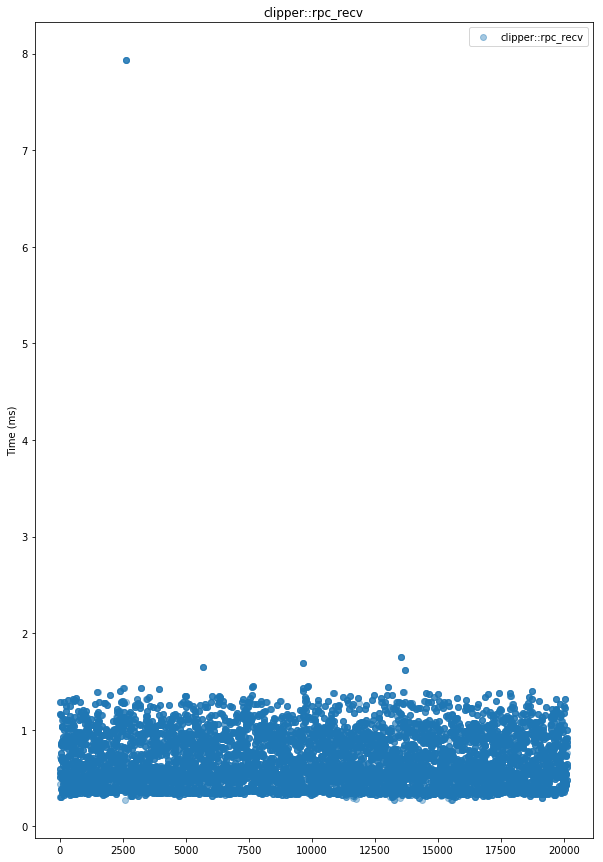

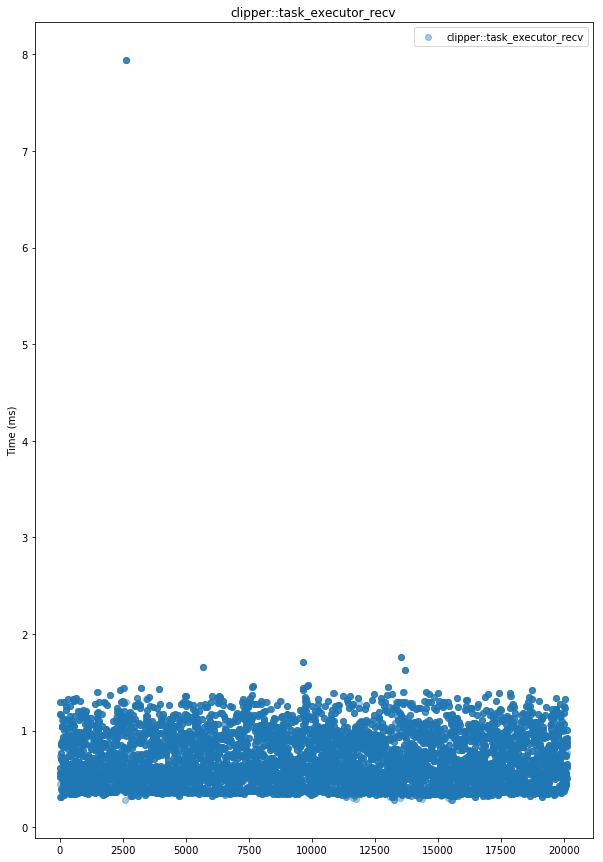

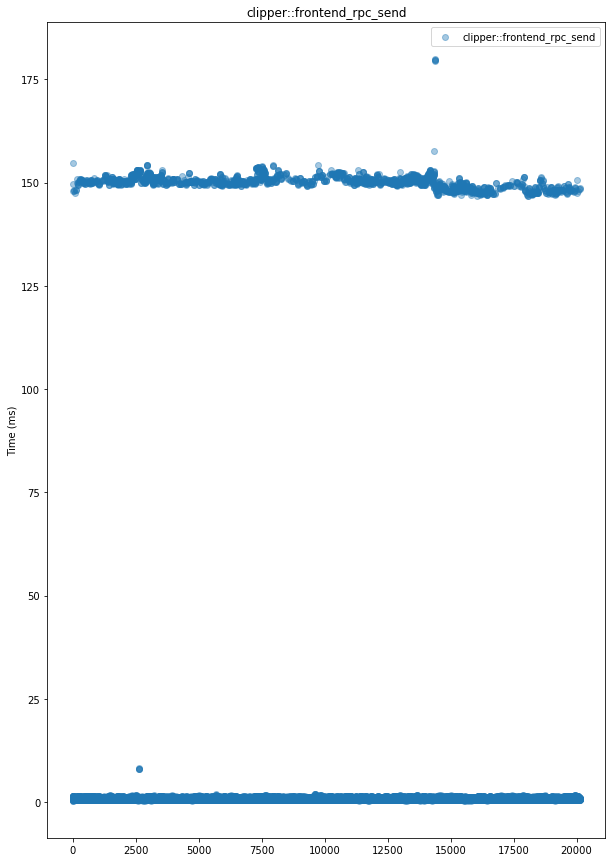

In [48]:
path = os.path.abspath("../results_cpp_benchmarker/query_lineage/query_lineage_tf-resnet-feats_smp_aws_cpp_profiling")
analyze_lineage(path)

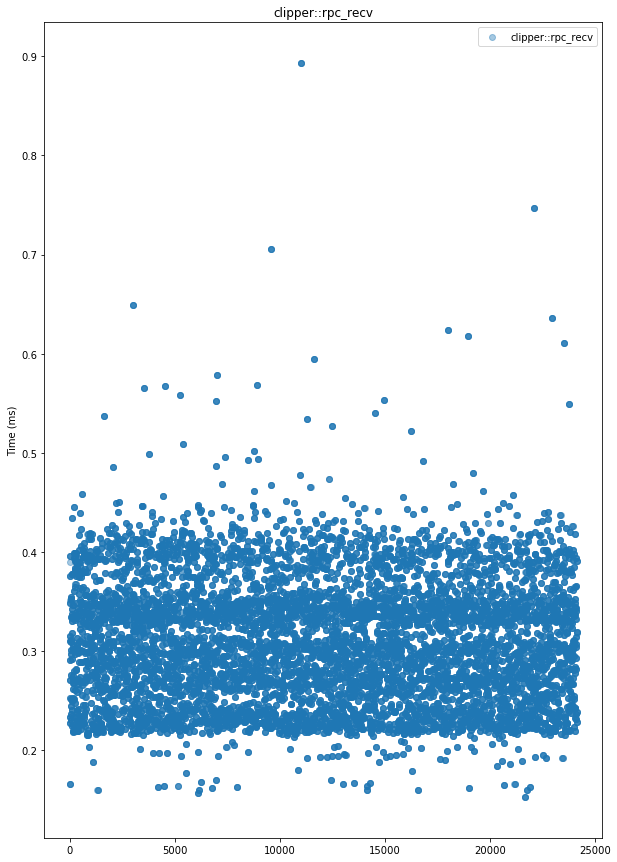

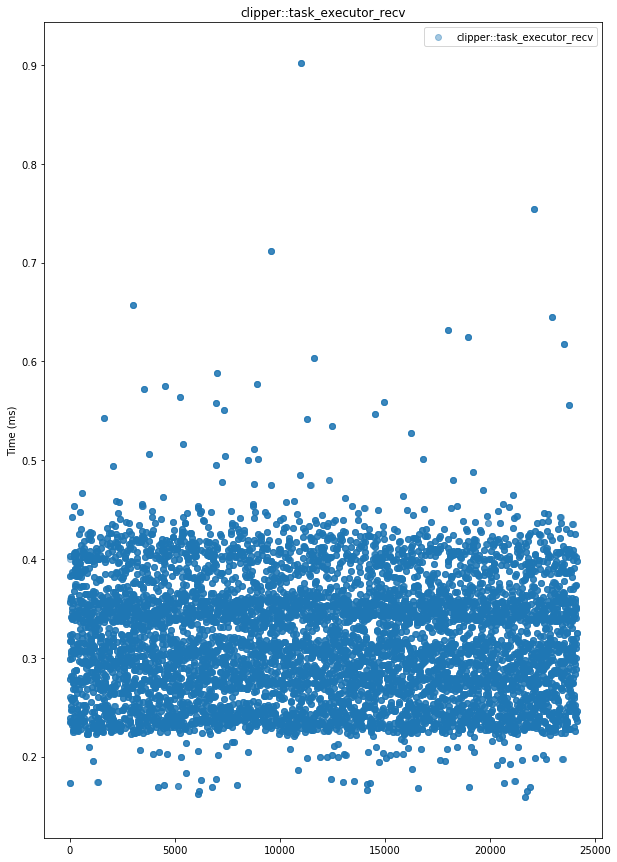

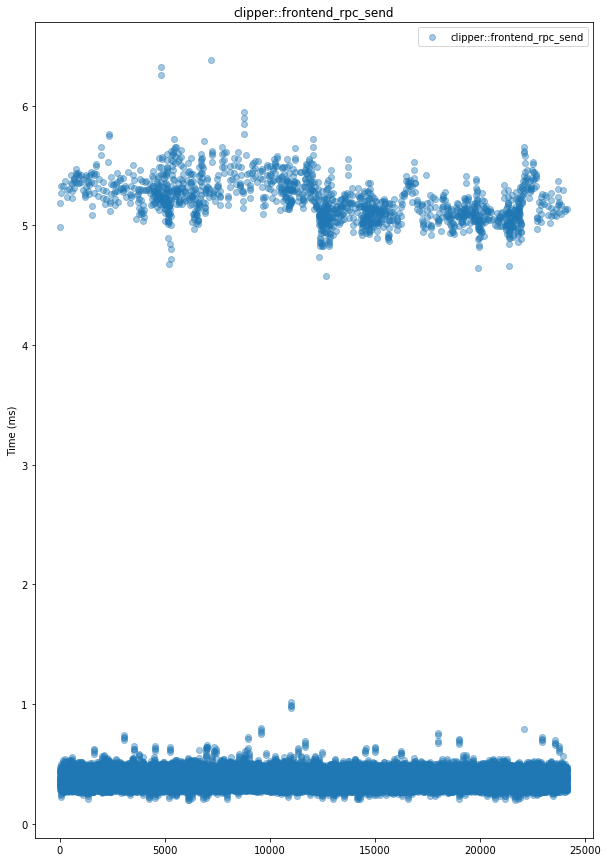

In [49]:
path = os.path.abspath("../results_cpp_benchmarker/query_lineage/query_lineage_tf-kernel-svm_smp_aws_cpp_profiling/cpp-aws-results-k80-batch-4-180316_082855.json")
analyze_lineage(path)